In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [35]:
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
import os


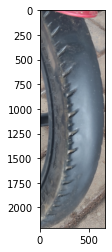

In [31]:
img=image.load_img("/content/drive/MyDrive/BASE_DATA_mul/Training/bad/s (264).jpg")
plt.imshow(img)

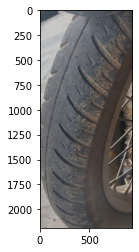

In [32]:
img=image.load_img("/content/drive/MyDrive/BASE_DATA_mul/Training/good/z (264).jpg")
plt.imshow(img)

In [33]:
import glob
x_train = glob.glob('/content/drive/MyDrive/BASE_DATA_mul/Training/bad/*.*')
y_train = glob.glob('/content/drive/MyDrive/BASE_DATA_mul/Training/good/*.*')


In [34]:


data = []
labels = []

for i in x_train:   
    image=tf.keras.preprocessing.image.load_img(i, color_mode='rgb', 
    target_size= (280,280))
    image=np.array(image)
    data.append(image)
    labels.append(0)




In [36]:
for i in y_train:   
    image=tf.keras.preprocessing.image.load_img(i, color_mode='rgb', 
    target_size= (280,280))
    image=np.array(image)
    data.append(image)
    labels.append(1)

In [37]:
len(data)

612

In [38]:
from sklearn.model_selection import train_test_split
X_train, X_test, ytrain, ytest = train_test_split(data, labels, test_size=0.2,random_state=70)

In [39]:
len(X_train)

489

In [40]:
X_train = np.array(X_train, dtype=np.float32)
X_test = np.array(X_test, dtype=np.float32)
ytrain = np.array(ytrain, dtype=np.float32)
ytest = np.array(ytest, dtype=np.float32)

In [41]:
print(ytrain.shape)

(489,)


In [42]:
print(len(X_train))
print(len(ytrain))
print(len(X_test))
print(len(ytest))

print(X_train.shape)
print(ytrain.shape)
print(X_test.shape)
print(ytest.shape)

489
489
123
123
(489, 280, 280, 3)
(489,)
(123, 280, 280, 3)
(123,)


In [43]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train = X_train / 255.0
X_test = X_test / 255.0

In [45]:
from keras.utils import np_utils
ytrain = np_utils.to_categorical(ytrain)
ytest = np_utils.to_categorical(ytest)
num_classes = ytest.shape[1]

In [57]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.optimizers import RMSprop
from keras.layers.convolutional import Conv2D
from keras.layers import BatchNormalization
from keras.layers.convolutional import MaxPooling2D
from sklearn.model_selection import train_test_split

In [47]:
def AlexNet_model():

    model = Sequential()
    
    model.add(Conv2D(32, (3, 3), input_shape=(280, 280, 3), activation='relu',padding='same'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    
    
    model.add(Conv2D(32, (3, 3), activation='relu',padding='same'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    
    model.add(Conv2D(64, (3, 3), activation='relu',padding='same'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    
    
    model.add(Conv2D(128, (3, 3), activation='relu',padding='same'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    
    model.add(Conv2D(128, (3, 3), activation='relu',padding='same'))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    model.add(Dropout(0.5))
    model.add(Flatten())
    
    model.add(Dense(1024, activation='relu'))
    model.add(Dense(512, activation='relu'))
    
    model.add(Dense(num_classes, activation='softmax'))
    
    lrate = 0.01
    epochs=25
    decay = lrate/epochs
    sgd = SGD(lr=lrate, momentum=0.9, decay=decay, nesterov=False)
    model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])
    
    return model

In [48]:
model = AlexNet_model()
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 280, 280, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 140, 140, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 140, 140, 32)      9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 70, 70, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 70, 70, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 35, 35, 64)       0

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


In [50]:
os.chdir("/content/drive/My Drive/2021/")
from keras.callbacks import ModelCheckpoint, CSVLogger
mc = ModelCheckpoint('TyreAlexNetNet.h5', monitor='val_loss', save_best_only=True)
cv = CSVLogger('TyreAlexNetNet.csv',append=True)

In [51]:
history=model.fit(np.array(X_train), np.array(ytrain), validation_split=(0.2), epochs=80, batch_size=32,verbose=2,callbacks=[cv,mc])

Epoch 1/80
13/13 - 14s - loss: 0.6937 - accuracy: 0.4962 - val_loss: 0.6893 - val_accuracy: 0.5306 - 14s/epoch - 1s/step
Epoch 2/80
13/13 - 1s - loss: 0.6914 - accuracy: 0.5141 - val_loss: 0.6866 - val_accuracy: 0.5306 - 1s/epoch - 93ms/step
Epoch 3/80
13/13 - 1s - loss: 0.6890 - accuracy: 0.5166 - val_loss: 0.6836 - val_accuracy: 0.5306 - 1s/epoch - 95ms/step
Epoch 4/80
13/13 - 1s - loss: 0.6904 - accuracy: 0.5115 - val_loss: 0.6860 - val_accuracy: 0.6327 - 950ms/epoch - 73ms/step
Epoch 5/80
13/13 - 1s - loss: 0.6839 - accuracy: 0.5371 - val_loss: 0.6819 - val_accuracy: 0.5306 - 1s/epoch - 93ms/step
Epoch 6/80
13/13 - 1s - loss: 0.6820 - accuracy: 0.5729 - val_loss: 0.6727 - val_accuracy: 0.6429 - 1s/epoch - 94ms/step
Epoch 7/80
13/13 - 1s - loss: 0.6877 - accuracy: 0.5371 - val_loss: 0.6758 - val_accuracy: 0.5918 - 952ms/epoch - 73ms/step
Epoch 8/80
13/13 - 1s - loss: 0.6722 - accuracy: 0.6138 - val_loss: 0.6592 - val_accuracy: 0.6531 - 1s/epoch - 90ms/step
Epoch 9/80
13/13 - 1s - lo

In [52]:
test_loss,test_acc=model.evaluate(X_test,ytest)
print(test_loss)
print(test_acc)

4/4 [==============================] - 1s 156ms/step - loss: 0.4449 - accuracy: 0.9024
0.4449049234390259
0.9024389982223511


In [53]:
train_loss = history.history['loss']
train_acc = history.history['accuracy']
val_loss = history.history['val_loss']
val_acc = history.history['val_accuracy']
xc=range(80)

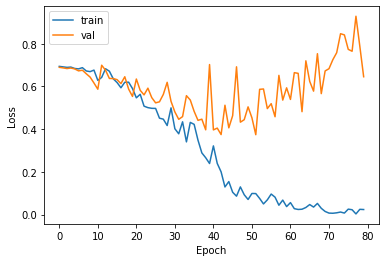

In [60]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(xc, train_loss)
plt.plot(xc, val_loss)
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend(['train','val'])

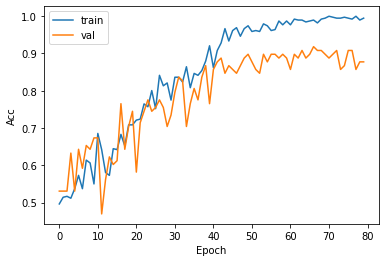

In [61]:
plt.plot(xc, train_acc)
plt.plot(xc, val_acc)
plt.xlabel("Epoch")
plt.ylabel("Acc")
plt.legend(['train','val'])